[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# START

In [1]:
!nvidia-smi

Sun Dec 31 03:21:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## Install YOLOv8

In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.5/8062.4 GB disk)


In [8]:
!pip install comet_ml

  Obtaining dependency information for comet_ml from https://files.pythonhosted.org/packages/41/74/c47ece0c210383fa79fbc48dbbfc9e9a4be51508e948160df7f866e0003a/comet_ml-3.35.5-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 4.0 MB/s eta 0:00:00
  Obtaining dependency information for dulwich!=0.20.33,>=0.20.6 from https://files.pythonhosted.org/packages/3c/da/51281ef790c2117520cb52e65fa563c83df9dd8ae7353030e353af13e68f/dulwich-0.21.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.8/586.8 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 39.8 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.6.2
    Uninstalling websocket-client-1.6.2:
      Successfully uninstalled websocket-client-1.6.2
ERROR: pip's de

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

# Download dataset

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NUB1ParPqXzNdVKa9Qzh")
project = rf.workspace("neural-ocean").project("neural_ocean")
dataset = project.version(3).download("yolov8")

/kaggle/working/datasets
  Obtaining dependency information for roboflow from https://files.pythonhosted.org/packages/f7/69/530445f36a3435638a7d137a3e60590f2fc68c46260623ca57c108110b4f/roboflow-1.1.14-py3-none-any.whl.metadata
  Obtaining dependency information for certifi==2023.7.22 from https://files.pythonhosted.org/packages/4c/dd/2234eab22353ffc7d94e8d13177aaa050113286e93e7b40eae01fbf7c3d9/certifi-2023.7.22-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.3 MB/s eta 0:00:00
  Obtaining dependency information for opencv-python-headless==4.8.0.74 from https://files.pythonhosted.org/packages/76/02/f128517f3ade4bb5f71e2afd8461dba70e3f466ce745fa1fd1fade9ad1b7/opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.0 MB/s eta 0:00:00
  Obtaining dependency info

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.231, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Neural_Ocean-3 in yolov8:: 100%|██████████| 10266/10266 [00:01<00:00, 8890.18it/s]


## Custom Training

In [6]:
%%writefile /kaggle/working/datasets/Neural_Ocean-3/data.yaml
names:
- Mask
- can
- cellphone
- electronics
- gbottle
- glove
- metal
- misc
- net
- pbag
- pbottle
- plastic
- rod
- sunglasses
- tire
nc: 15
roboflow:
  license: CC BY 4.0
  project: underwater-65x5j
  url: https://universe.roboflow.com/project/underwater-65x5j/dataset/3
  version: 3
  workspace: project
test: test/images
train: train/images
val: valid/images

Overwriting /kaggle/working/datasets/Neural_Ocean-3/data.yaml


In [11]:
COMET_API_KEY= "3zQ0uTuomdAbK0rLxlvjCBB8c"

In [26]:
%cd /kaggle/working/
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True device=0,1 batch=32 mixup=0.2

/kaggle/working
Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/Neural_Ocean-3/data.yaml, epochs=100, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=(0, 1), workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

In [27]:
!ls {HOME}/runs/detect/train4/

F1_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch10260.jpg
P_curve.png					    train_batch10261.jpg
R_curve.png					    train_batch10262.jpg
args.yaml					    train_batch2.jpg
confusion_matrix.png				    val_batch0_labels.jpg
confusion_matrix_normalized.png			    val_batch0_pred.jpg
events.out.tfevents.1704001877.68ce767e9f9b.1071.0  val_batch1_labels.jpg
labels.jpg					    val_batch1_pred.jpg
labels_correlogram.jpg				    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


/kaggle/working


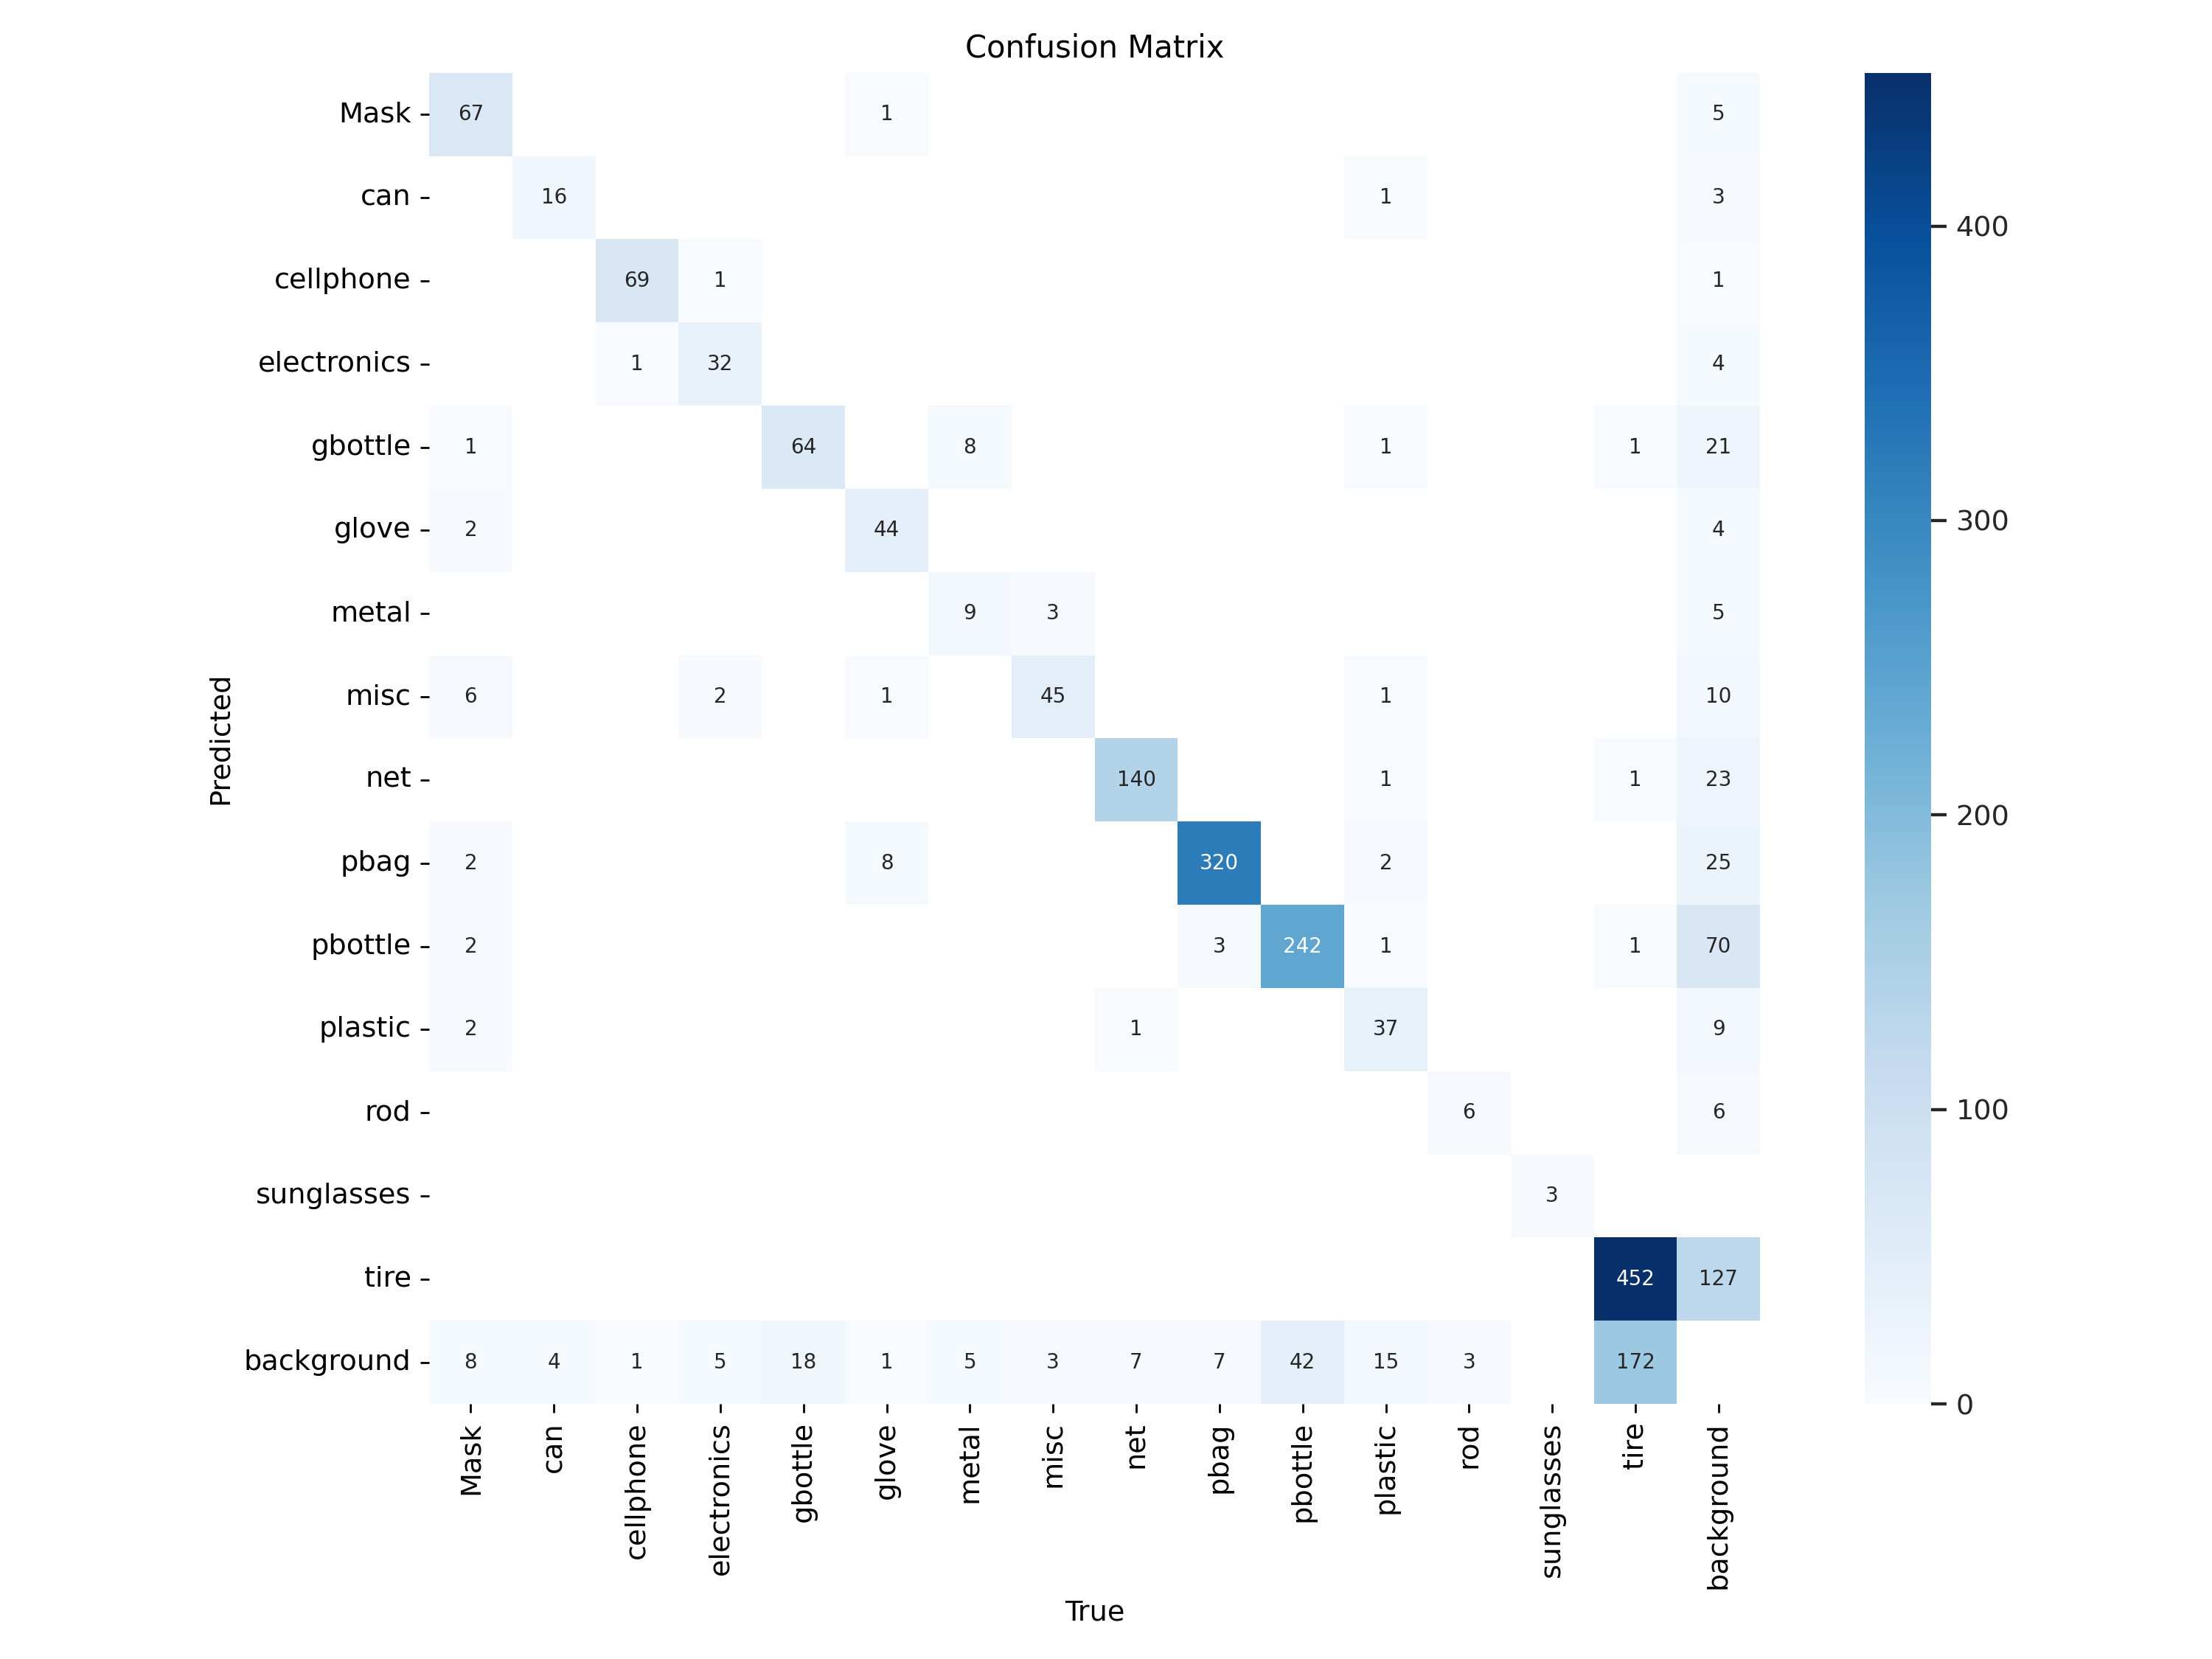

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png')

/kaggle/working


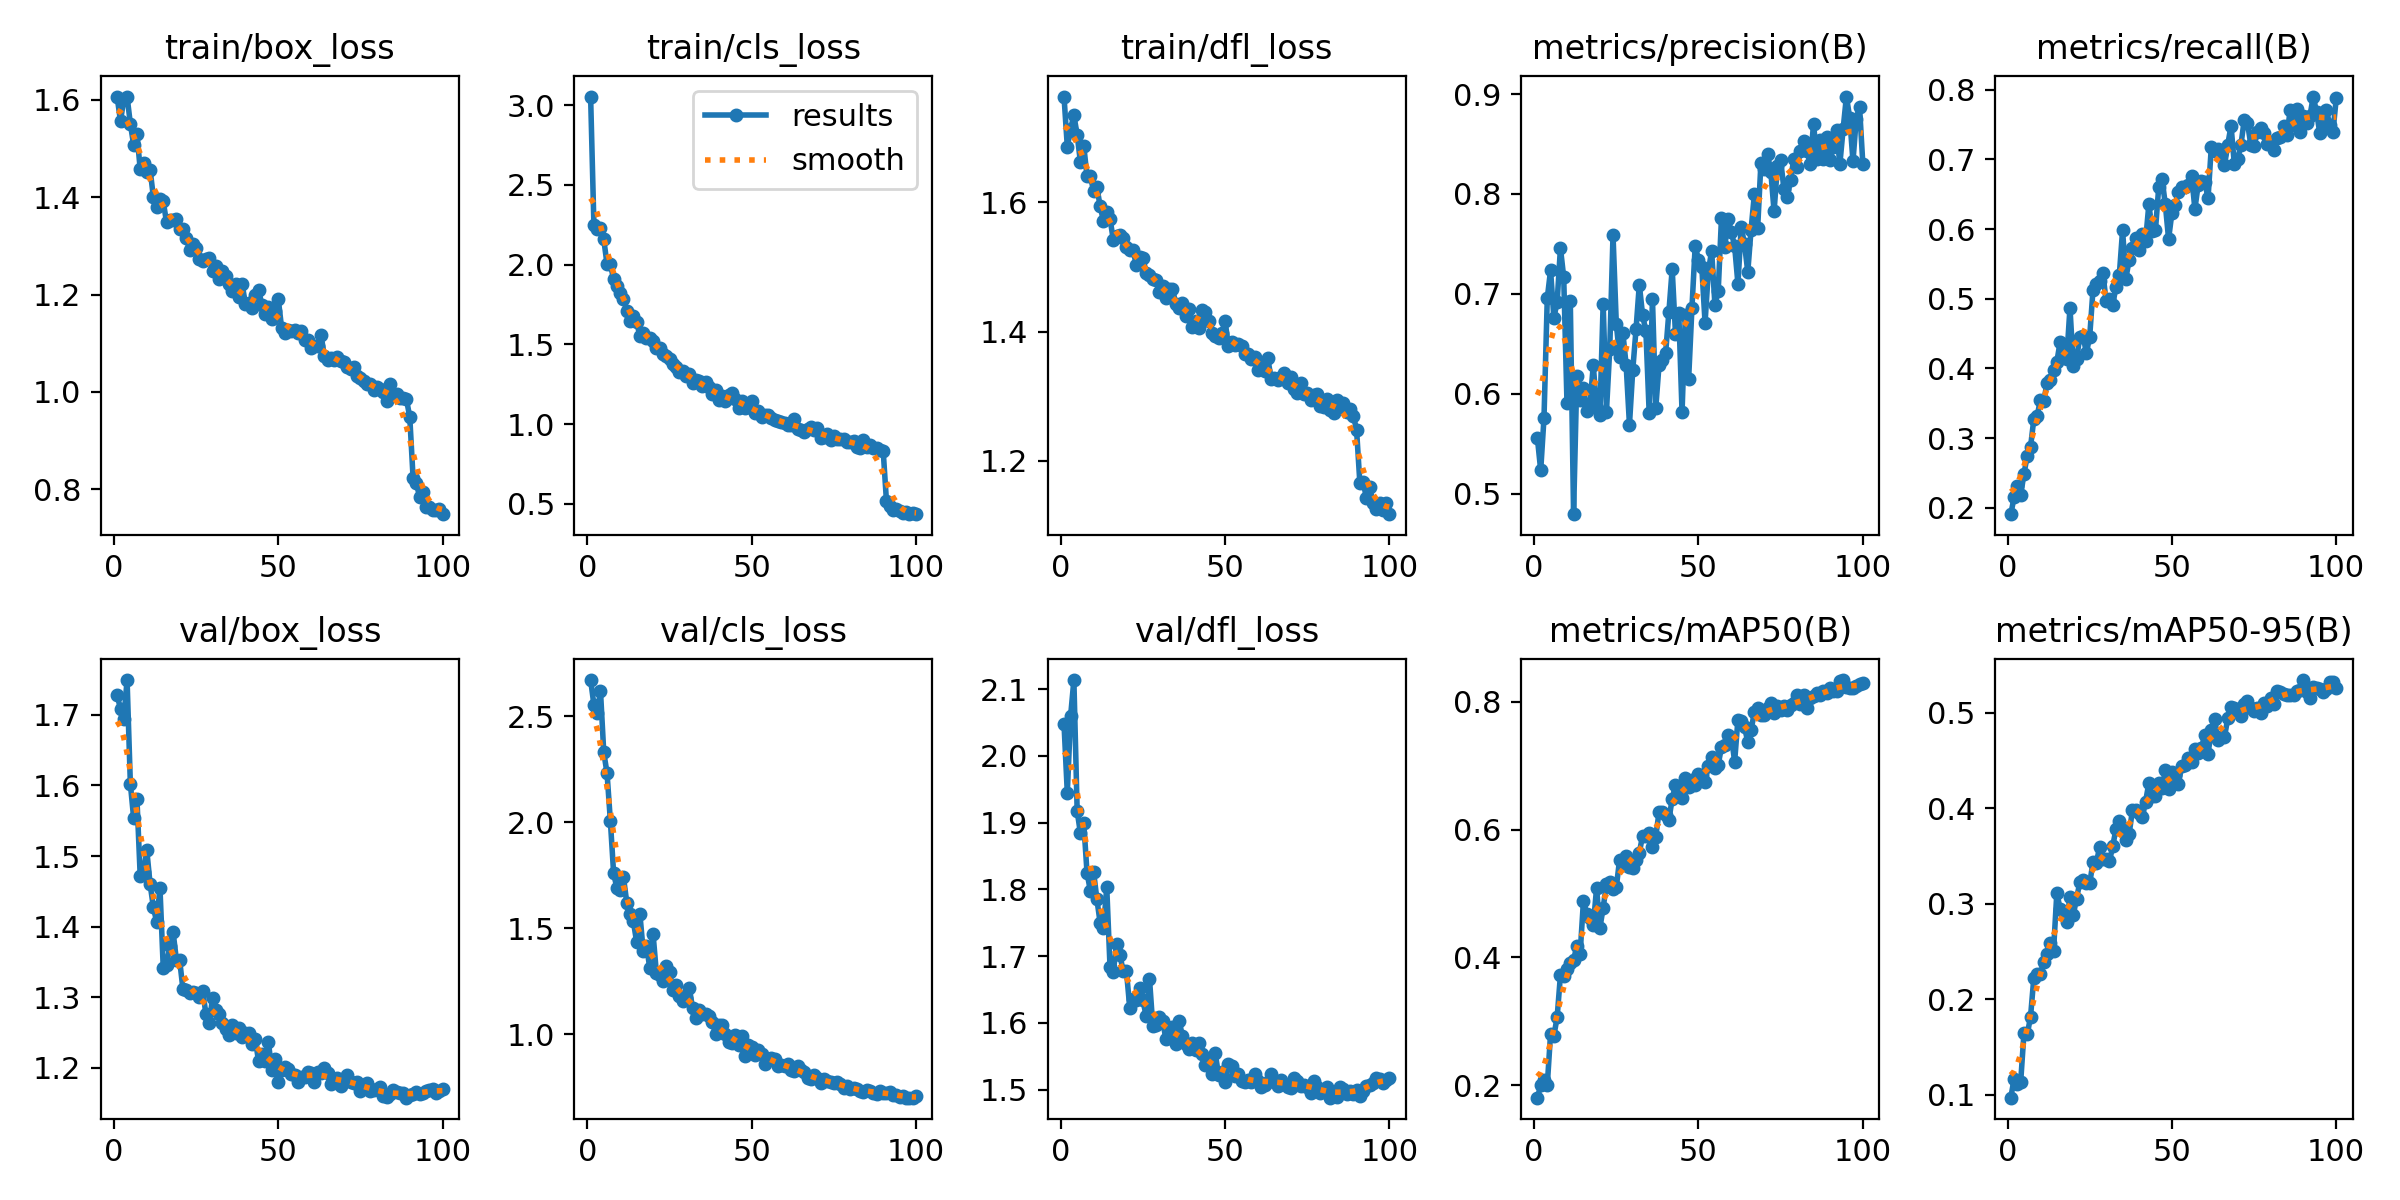

In [30]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png')

/kaggle/working


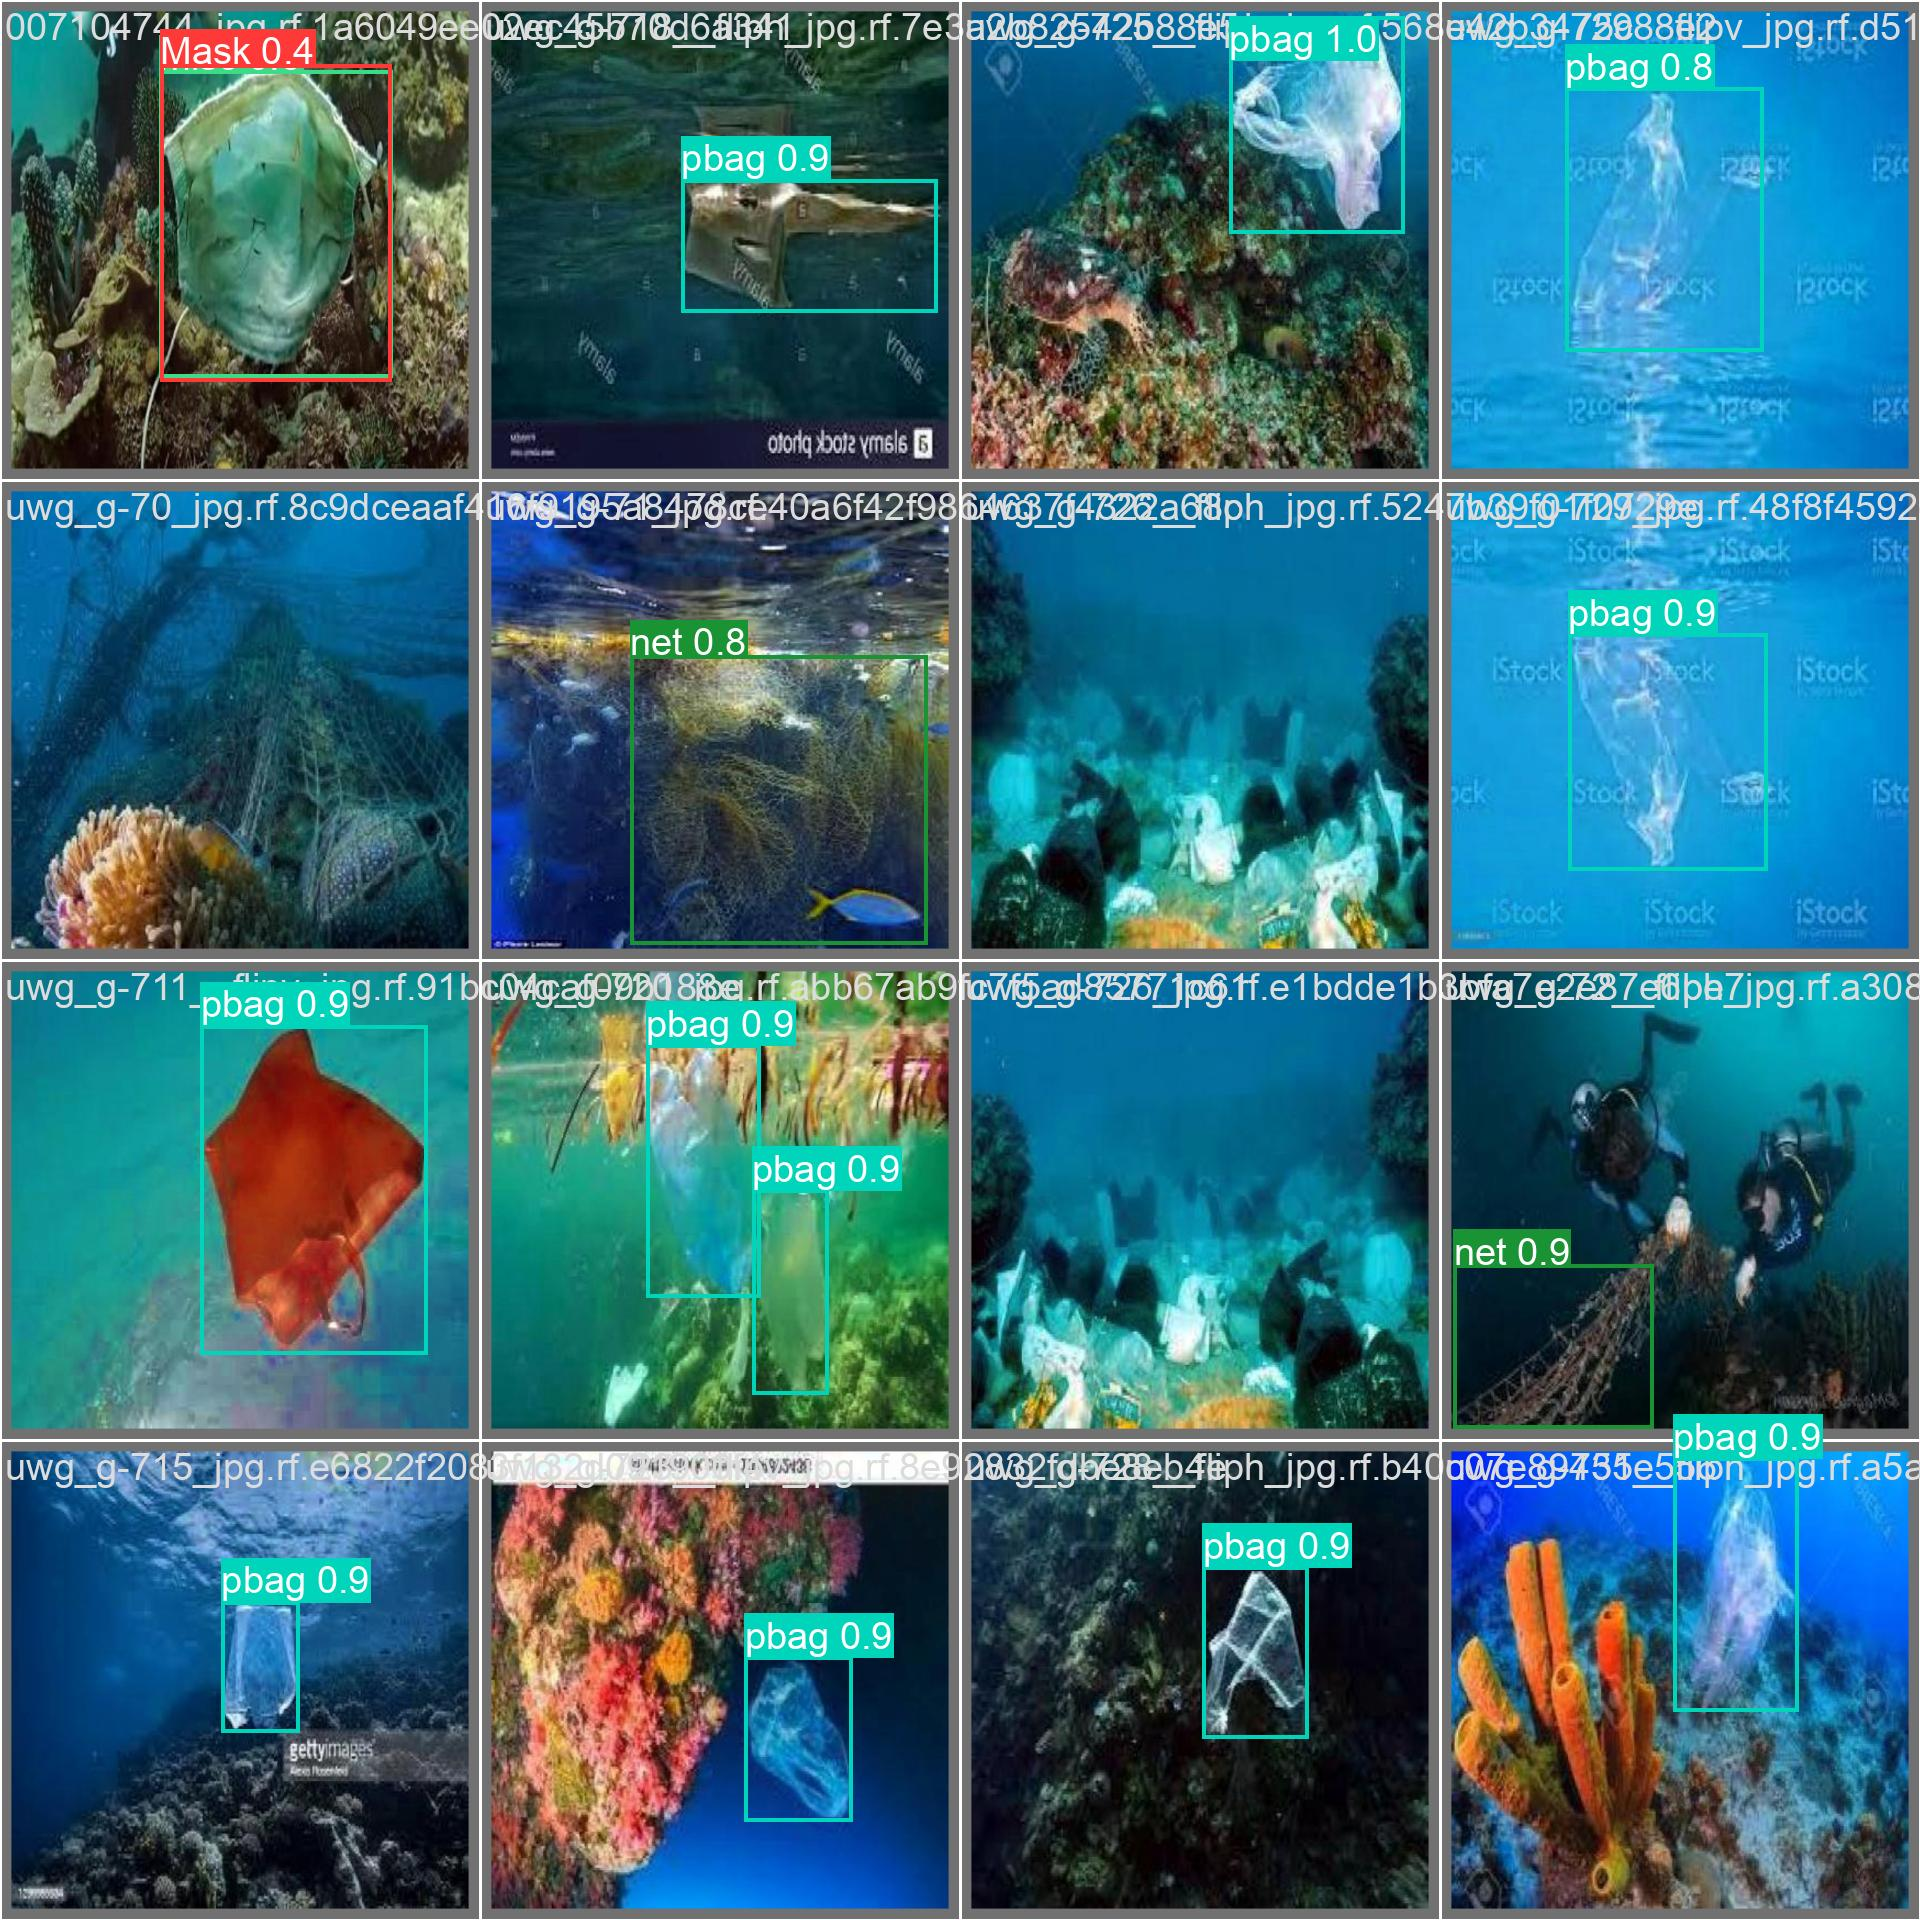

In [31]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg')

## Validate Custom Model

In [33]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml device=0,1

/kaggle/working
Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11131389 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /kaggle/working/datasets/Neural_Ocean-3/valid/labels.cache... 1000
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1000       1891      0.835      0.762      0.821      0.534
                  Mask       1000         90      0.956      0.725      0.948      0.714
                   can       1000         20      0.851       0.75      0.844      0.374
             cellphone       1000         71      0.974      0.972      0.988      0.876
           electronics       1000         40      0.906      0.775      0.816      0.497
               gbottle       1000         82      0.726       0.78      0.808       0.58
                 glove       1000         

## Inference with Custom Model

In [34]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True device=0,1

/kaggle/working
Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11131389 parameters, 0 gradients, 28.5 GFLOPs

image 1/501 /kaggle/working/datasets/Neural_Ocean-3/test/images/1bc7-iudfmpmn7245599_jpg.rf.0c27f6617b1c2d7665a4badbb8474e28.jpg: 640x640 1 glove, 16.6ms
image 2/501 /kaggle/working/datasets/Neural_Ocean-3/test/images/200623160205-05-coronavirus-waste-pollution-super-169_jpg.rf.2cb8ff79c143c7677ba333349c528e23.jpg: 640x640 1 Mask, 1 pbag, 1 pbottle, 16.4ms
image 3/501 /kaggle/working/datasets/Neural_Ocean-3/test/images/66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.6e27d3429e5c183f0785e36626e232c2.jpg: 640x640 3 Masks, 1 pbag, 2 plastics, 16.4ms
image 4/501 /kaggle/working/datasets/Neural_Ocean-3/test/images/7_JPG_jpg.rf.c73c6cc42828be1d9a13a8a520607ca8.jpg: 640x640 1 Mask, 16.4ms
image 5/501 /kaggle/working/datasets/Neural_Ocean-

**NOTE:** Let's take a look at few results.

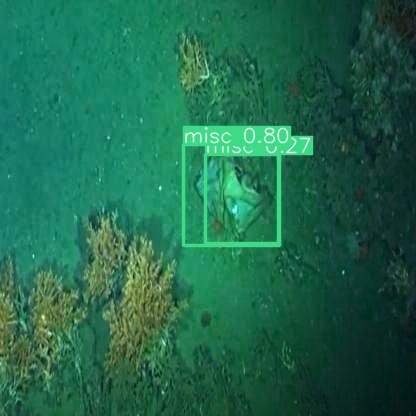

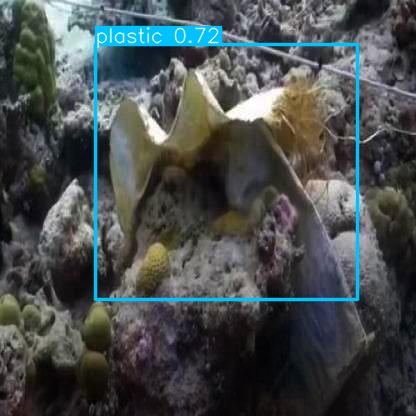

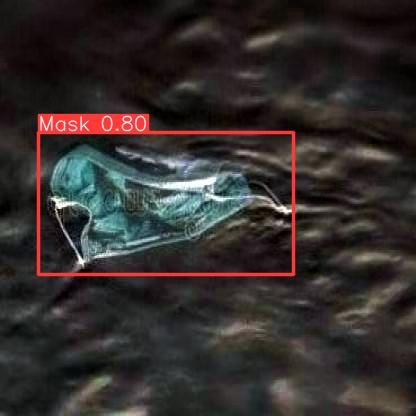

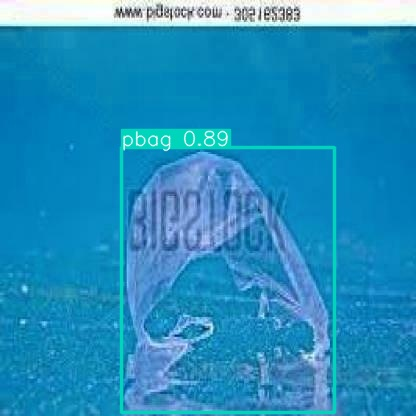

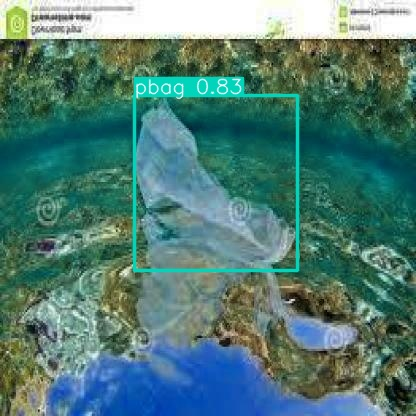

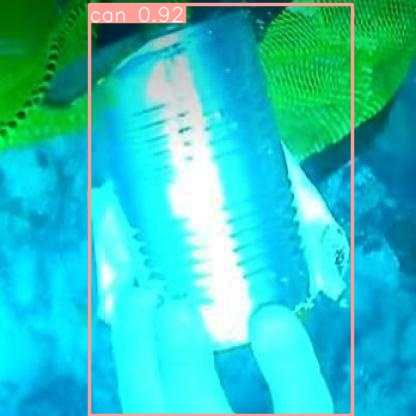

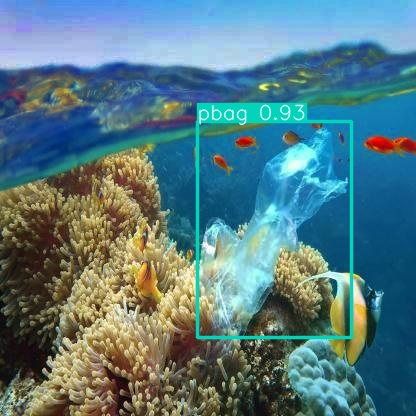

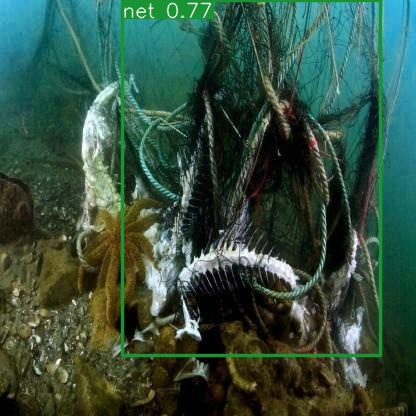

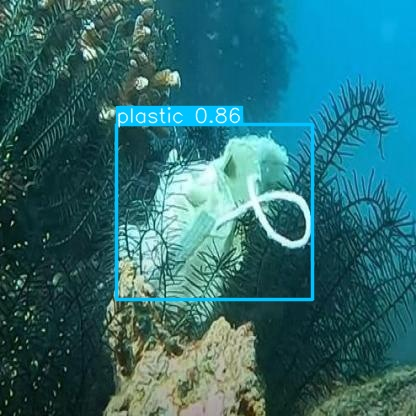

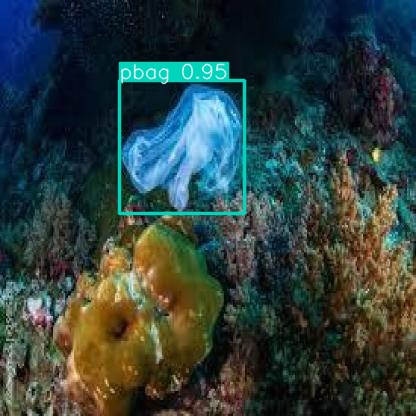

In [36]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:10]:
      display(Image(filename=image_path))
